In [1]:
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
from cliff.api import Cliff
import seaborn as sns

# Data Preprocessing

## Dropping data with empty dates and sorting data by date

In [3]:
dataset = pd.read_csv('india-news-headlines.csv')

In [4]:
dataset.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [5]:
dataset = dataset.rename(columns = {'publish_date': 'date', 'headline_text': 'title'})

In [6]:
dataset['date']= pd.to_datetime(dataset['date'].astype(str), format='%Y%m%d')

In [7]:
dataset.head()

,date,headline_category,title
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


<AxesSubplot:xlabel='date', ylabel='title'>

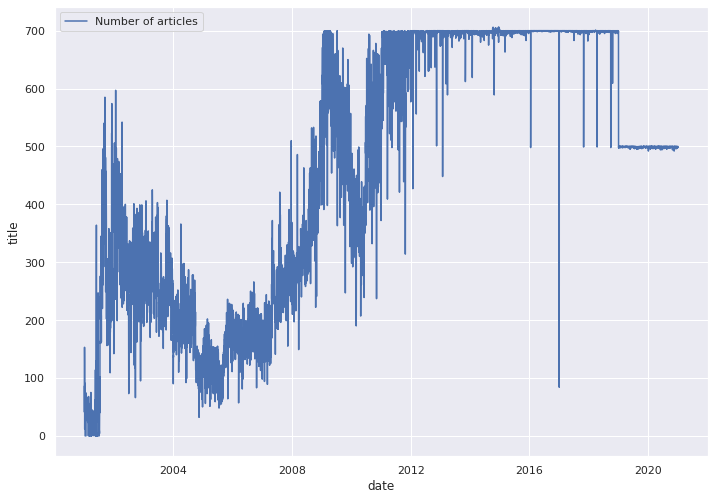

In [8]:
data_visualise = dataset.groupby(pd.Grouper(key = 'date', freq = '1D')).count()
 
sns.lineplot(data = data_visualise, x = 'date', y = 'title', label = 'Number of articles')

In [9]:
dataset = dataset.sort_values(by = ['date'], ignore_index = True)

In [10]:
dataset.head()

,date,headline_category,title
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Petition over ministers' assets dismissed
2,2001-01-02,unknown,Bomb hoax triggers panic in Canara Bank
3,2001-01-02,unknown,Consul is back from month-long leave
4,2001-01-02,unknown,Redemption night; amid some rock


In [11]:
# Counts number of NaT values
na = dataset['date'].isnull().sum()
print(na)

0


Text(0.5, 1.0, 'Number of Articles By Year')

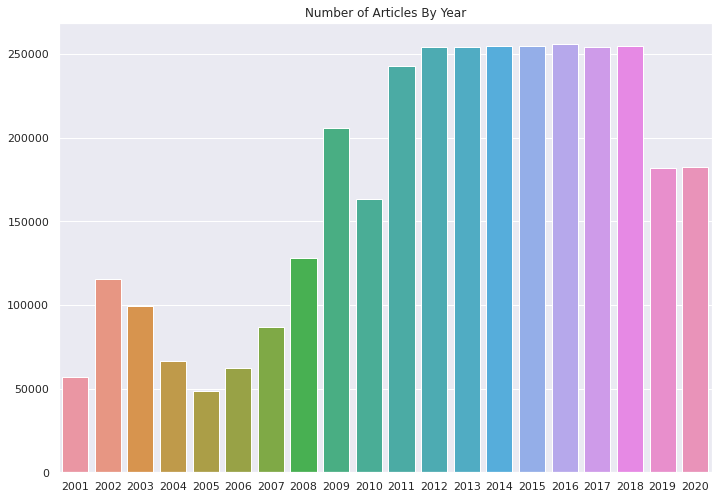

In [12]:

sns.barplot(x= dataset['date'].dt.year.value_counts().index, y =dataset['date'].dt.year.value_counts().values)
plt.title('Number of Articles By Year')

## Predicting subject country of each article

In [13]:
# Execute the following from command-line first before running this cell
# docker pull rahulbot/cliff-clavin:latest
# docker run -p 8080:8080 -m 8G -d rahulbot/cliff-clavin:latest
 
my_cliff = Cliff('http://localhost:8080')
dataset["geoparsed"] = [my_cliff.parse_text(x) for x in tqdm(dataset["title"])]

 12%|█▏        | 404959/3424067 [22:01<4:24:29, 190.24it/s]

In [ ]:
dataset.to_json('india-news-headlines-geoparsed.json')

In [ ]:
dataset.head()

,title,text,domain,date,description,url,image_url,geoparsed
359647,New Trump Crackdown Seeks to Sever Ties Betwee...,The Trump administration announced on Wednesda...,www.infowars.com,2018-01-01,,https://www.infowars.com/new-trump-crackdown-s...,https://hw.infowars.com/wp-content/uploads/201...,"{'milliseconds': 1176, 'language': 'EN', 'vers..."
359648,Adam Schiff: FISA Memo Could Lead To Firings O...,Stocks are red. Trey Gowdy is abruptly retirin...,www.infowars.com,2018-01-01,,https://www.infowars.com/adam-schiff-fisa-memo...,https://hw.infowars.com/wp-content/uploads/201...,"{'milliseconds': 95, 'language': 'EN', 'versio..."
359649,आपके खाते में जमा पैसों को लेकर सबसे जरूरी खबर...,Read the latest and breaking Hindi news on ama...,www.amarujala.com,2018-01-01,आपके बैंक खाते में जमा रकम को लेकर सबसे जरूरी ...,https://www.amarujala.com/photo-gallery/dehrad...,https://spiderimg.amarujala.com/assets/images/...,"{'milliseconds': 13, 'language': 'EN', 'versio..."
359650,"A Year After Obama, Desperate Dems Still Looki...",More than a year after former President Obama ...,www.infowars.com,2018-01-01,,https://www.infowars.com/a-year-after-obama-de...,https://hw.infowars.com/wp-content/uploads/201...,"{'milliseconds': 21, 'language': 'EN', 'versio..."
359651,"Affordable Care Act is weaker but not dying, s...",The broadly revamped tax code that Congress pa...,news.harvard.edu,2018-01-01,The repeal of the Affordable Care Act’s indivi...,https://news.harvard.edu/gazette/story/2018/02...,https://i1.wp.com/news.harvard.edu/wp-content/...,"{'milliseconds': 212, 'language': 'EN', 'versi..."
